<a href="https://colab.research.google.com/github/harshithap99/open-lab/blob/master/using_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
hispa_dir='/content/drive/My Drive/DATASET/LabelledRice/Labelled/Hispa'
leafblast_dir='/content/drive/My Drive/DATASET/LabelledRice/Labelled/LeafBlast'
brownspot_dir='/content/drive/My Drive/DATASET/LabelledRice/Labelled/BrownSpot'
Healthy_dir='/content/drive/My Drive/DATASET/LabelledRice/Labelled/Healthy'

In [4]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            imagedetails.append(np.array(image))
            imagelabels.append(str(label))

read_image("hispa",hispa_dir)
read_image("leafblast",leafblast_dir)
read_image("brownspot",brownspot_dir)
read_image("healthy",Healthy_dir)  

100%|██████████| 1488/1488 [12:43<00:00,  1.95it/s]


In [5]:
#LabelEncoder() is a default function which will be used to convert the strings label to int label
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 4 categories
y = to_categorical(y,4)
print(y)
print(X.shape)
print(y.shape)

[[[[228 172 148]
   [228 172 148]
   [228 172 147]
   ...
   [223 165 147]
   [223 165 147]
   [225 166 149]]

  [[226 170 146]
   [229 173 149]
   [228 172 148]
   ...
   [222 164 146]
   [224 165 148]
   [224 166 148]]

  [[227 171 146]
   [227 171 146]
   [227 171 146]
   ...
   [222 163 146]
   [223 164 147]
   [222 165 144]]

  ...

  [[228 172 147]
   [228 172 148]
   [229 173 148]
   ...
   [219 163 138]
   [219 164 139]
   [218 162 137]]

  [[227 171 147]
   [228 172 148]
   [229 173 149]
   ...
   [220 164 139]
   [219 163 138]
   [219 163 138]]

  [[228 172 147]
   [227 171 147]
   [227 171 146]
   ...
   [220 164 139]
   [220 164 139]
   [219 163 138]]]


 [[[248 188 178]
   [248 187 177]
   [249 188 178]
   ...
   [212 167 163]
   [215 170 165]
   [225 176 171]]

  [[243 187 176]
   [248 187 177]
   [247 186 176]
   ...
   [216 169 164]
   [223 175 170]
   [235 177 173]]

  [[243 187 176]
   [247 187 177]
   [247 187 177]
   ...
   [220 172 168]
   [225 177 173]
   [236 178

In [6]:
#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total

((2146, 150, 150, 3),
 (2146, 4),
 (671, 150, 150, 3),
 (671, 4),
 (537, 150, 150, 3),
 (537, 4))

In [0]:
batch_size = 64
# as we increase the number of epochs the accuracy will increase
epochs = 30
num_classes = y.shape[1]

In [0]:
model = Sequential()
#we are using sequential model

#kernel size is mask                                                                                                                              xrnel
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2)))
#dropout is used to prevent the overfitting by a given percentage
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 165888)           

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [0]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [17]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=150)
# even if we change the steps_per_epoch ten also the accuracy will increase

Epoch 1/30
150/150 [==============================] - 1222s 8s/step - loss: 2.5561 - accuracy: 0.4741 - val_loss: 1.2722 - val_accuracy: 0.4203
Epoch 2/30
150/150 [==============================] - 1220s 8s/step - loss: 1.1344 - accuracy: 0.5248 - val_loss: 1.1850 - val_accuracy: 0.4724
Epoch 3/30
150/150 [==============================] - 1192s 8s/step - loss: 1.1118 - accuracy: 0.5251 - val_loss: 1.3026 - val_accuracy: 0.4024
Epoch 4/30
150/150 [==============================] - 1202s 8s/step - loss: 1.0838 - accuracy: 0.5440 - val_loss: 1.2021 - val_accuracy: 0.4948
Epoch 5/30
150/150 [==============================] - 1247s 8s/step - loss: 1.0822 - accuracy: 0.5414 - val_loss: 1.2021 - val_accuracy: 0.4754
Epoch 6/30
150/150 [==============================] - 1198s 8s/step - loss: 1.0681 - accuracy: 0.5551 - val_loss: 1.2033 - val_accuracy: 0.4844
Epoch 7/30
150/150 [==============================] - 1241s 8s/step - loss: 1.0589 - accuracy: 0.5549 - val_loss: 1.2783 - val_accuracy:

In [18]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

537/537 [==============================] - 15s 29ms/step


In [0]:
#for the train set X we are calculating the output y using the model defined above 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)

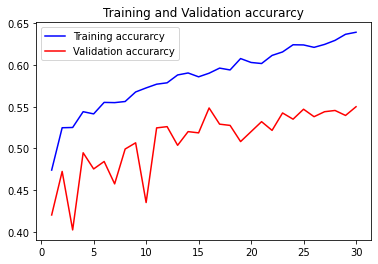

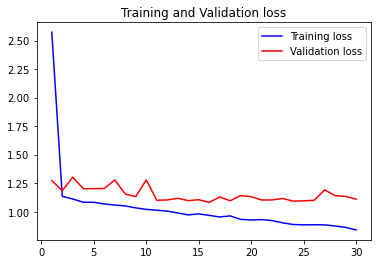

In [20]:

acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [21]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

347 Images are identified correctly
190 Images are identified incorrectly


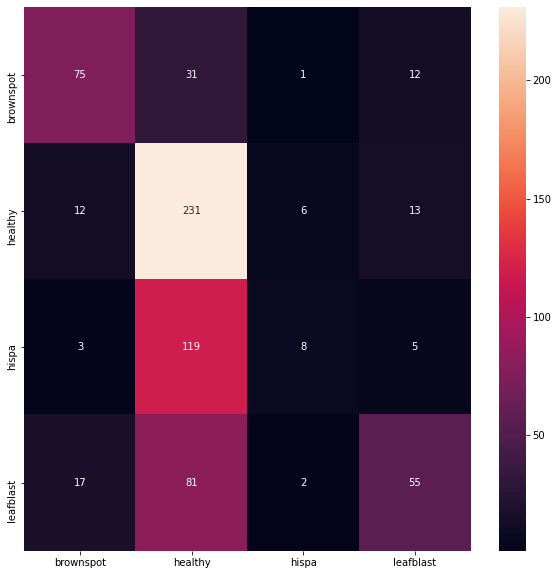

In [22]:

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_valid)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_valid,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()

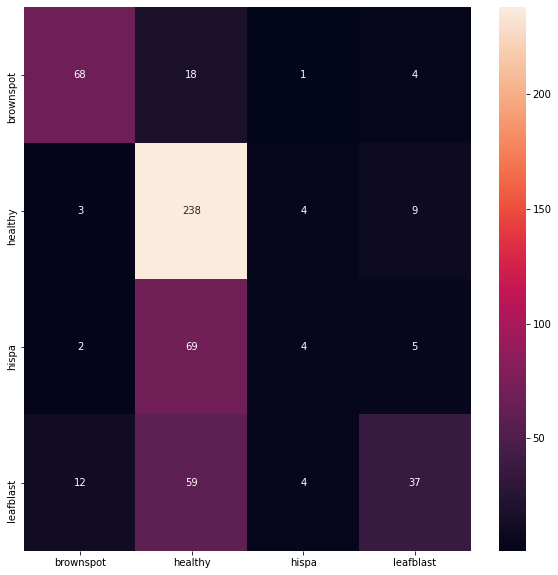

In [23]:

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()